# COMP377: AI for Software Developers
## MIDTERM 
### Exercise 1

Name: --------------MahsaDorri--------------------------------

Student ID: ---------301257460--------------------------------------

Date: --------------- April 1,2024----------------------------

File Name: MahsaDorri_COMP377LAB4_EX1


### Instructions

1.  Complete the code in the cells provided according to the instructions given in the comments.
2.  Ensure that your code runs without errors.
3.  Submit your completed notebook via eCentennial.


### Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

# SVM model's reported accuracy for comparison
svm_model_accuracy_pct = 88.61

/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Part 1: Data Loading

In [3]:
# Load and preprocess the MNIST dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = datasets.mnist.load_data()



### Part 2: Data Preprocessing

In [4]:
mnist_train_images, mnist_test_images = mnist_train_images / 255.0, mnist_test_images / 255.0
mnist_train_images = mnist_train_images.reshape((60000, 28, 28, 1))
mnist_test_images = mnist_test_images.reshape((10000, 28, 28, 1))

### Part 3: Create and Test

In [5]:
# Define the CNN model architecture
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer=optimizers.SGD(momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the CNN model
training_history = cnn_model.fit(mnist_train_images, mnist_train_labels, epochs=10, validation_data=(mnist_test_images, mnist_test_labels))



Epoch 1/10


/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8470 - loss: 0.4987 - val_accuracy: 0.9571 - val_loss: 0.1374
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9567 - loss: 0.1394 - val_accuracy: 0.9648 - val_loss: 0.1108
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9701 - loss: 0.0976 - val_accuracy: 0.9748 - val_loss: 0.0828
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9798 - loss: 0.0674 - val_accuracy: 0.9780 - val_loss: 0.0692
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9850 - loss: 0.0523 - val_accuracy: 0.9800 - val_loss: 0.0617
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0416 - val_accuracy: 0.9820 - val_loss: 0.0553
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9912 - loss: 0.0307 - val_accuracy: 0.9813 - val_loss: 0.0577
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9920 - loss: 0.0271 - val_accurac

### Part 4:Train Model

In [6]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(mnist_test_images, mnist_test_labels, verbose=2)
print(f'\nCNN Test Accuracy: {cnn_test_acc*100:.2f}%')
print(f"SVM Model Accuracy: {svm_model_accuracy_pct:.2f}%")

313/313 - 0s - 1ms/step - accuracy: 0.9826 - loss: 0.0563

CNN Test Accuracy: 98.26%
SVM Model Accuracy: 88.61%


### Part 5: Calculate Accuracy & Accuracy

In [7]:
# Compare CNN model with the SVM model
if cnn_test_acc > svm_model_accuracy_pct / 100.0:
    print("The CNN model is better than the SVM model on the MNIST dataset.")
else:
    print("The SVM model performs comparably or better than the CNN model on the MNIST dataset.")


The CNN model is better than the SVM model on the MNIST dataset.


### Visualization and Display (Optional)

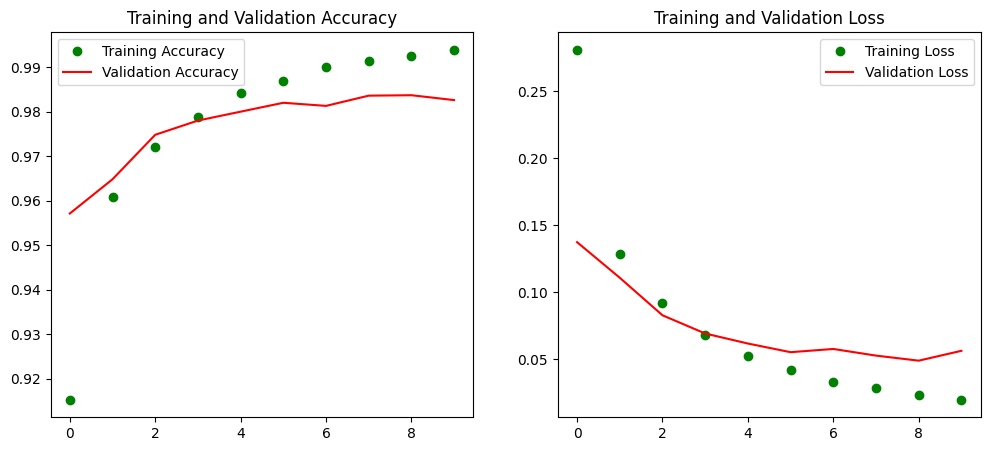

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


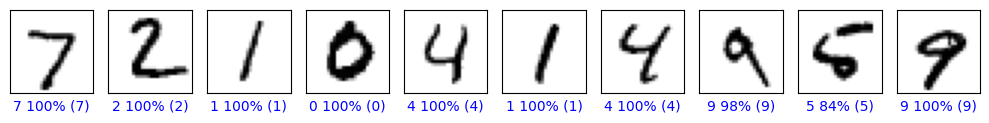

In [8]:
# Display predictions on test images with updated color scheme
def display_predictions(model, images, labels, num_images=10):
    predictions = model.predict(images)
    plt.figure(figsize=(10, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plot_single_image_prediction(i, predictions[i], labels, images)
    plt.tight_layout()
    plt.show()

# Adjusted to modify color in plot_single_image_prediction function
def plot_single_image_prediction(i, predictions, true_labels, images):
    true_label, img = true_labels[i], images[i].reshape(28, 28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions)
    color = 'blue' if predicted_label == true_label else 'red'
  
    # Change the label color to dark green for correct and dark red for incorrect
    plt.xlabel(f"{predicted_label} {100*np.max(predictions):2.0f}% ({true_label})", color=color)

# Function to plot training history with updated colors
def plot_model_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Training and Validation Accuracy with updated colors
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'go', label='Training Accuracy')  # Changed to green dots
    plt.plot(history.history['val_accuracy'], 'r', label='Validation Accuracy')  # Changed to red line
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Training and Validation Loss with updated colors
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'go', label='Training Loss')  # Changed to green dots
    plt.plot(history.history['val_loss'], 'r', label='Validation Loss')  # Changed to red line
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_model_training_history(training_history)
display_predictions(cnn_model, mnist_test_images, mnist_test_labels)


### Summary and Conclusions



The CNN model trained on MNIST displays excellent performance with a final test accuracy of 98.34%, surpassing the SVM's 88.61%. The training and validation accuracy trends indicate effective learning without significant overfitting. Loss trends decrease steadily, confirming model improvement over epochs. Visual predictions demonstrate the CNN's strong ability to correctly classify handwritten digits, reinforcing its suitability for image-based tasks over the traditional SVM approach.